In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')

In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Check for null data
df.isnull().sum().sum()

0

In [4]:
df.shape

(768, 9)

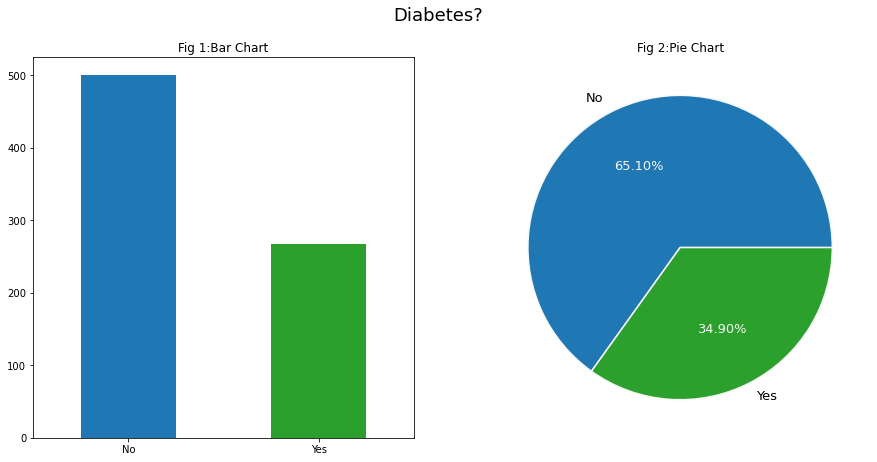

In [5]:
# Plot Bar chart and Pie Chart to check the total no. of persons with Diabetes and the percentage distribution
f, ax = plt.subplots(1, 2, figsize = (15, 7))

f.suptitle("Diabetes?", fontsize = 18.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"],title='Fig 1:Bar Chart')
_ = df.Outcome.value_counts().plot.pie(title='Fig 2:Pie Chart',labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

<AxesSubplot:xlabel='BMI', ylabel='Count'>

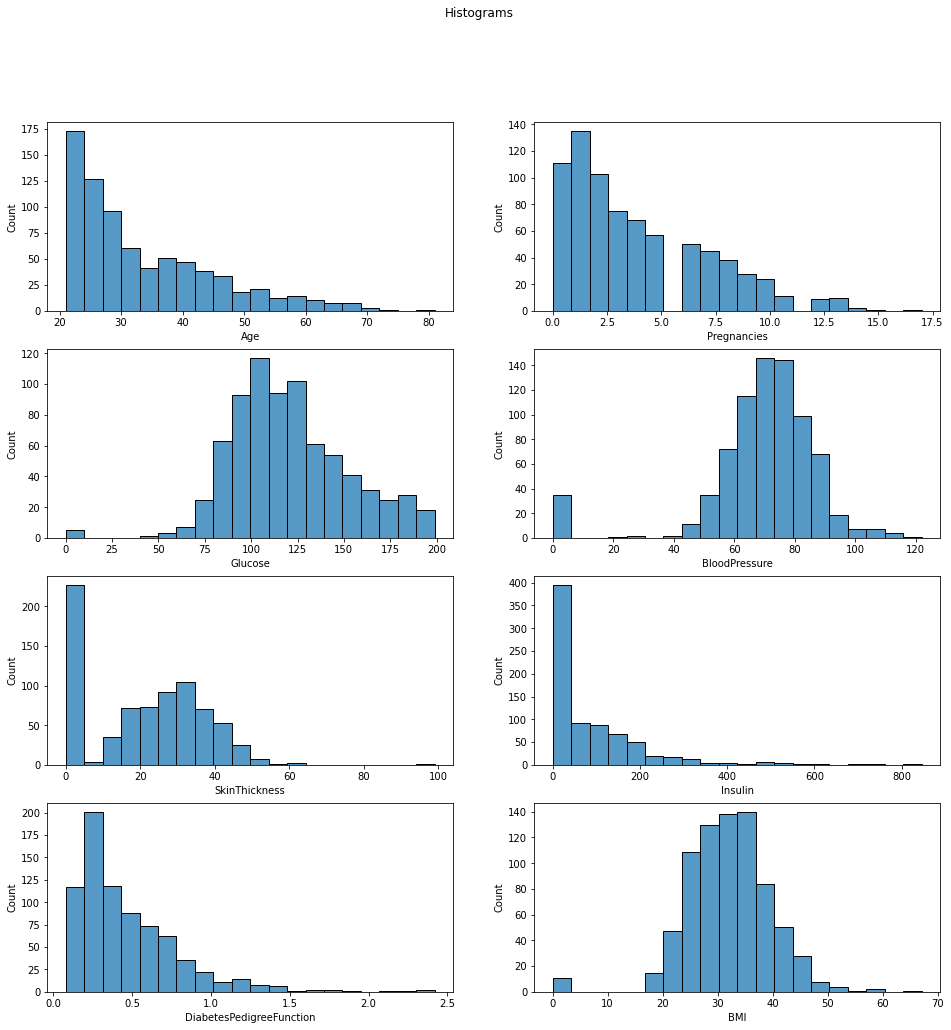

In [6]:
# Univairate distribution
fig, ax = plt.subplots(4,2, figsize=(16,16))
fig.suptitle('Histograms')
sns.histplot(df.Age, bins = 20, ax=ax[0,0])
sns.histplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.histplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.histplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.histplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.histplot(df.BMI, bins = 20, ax=ax[3,1])

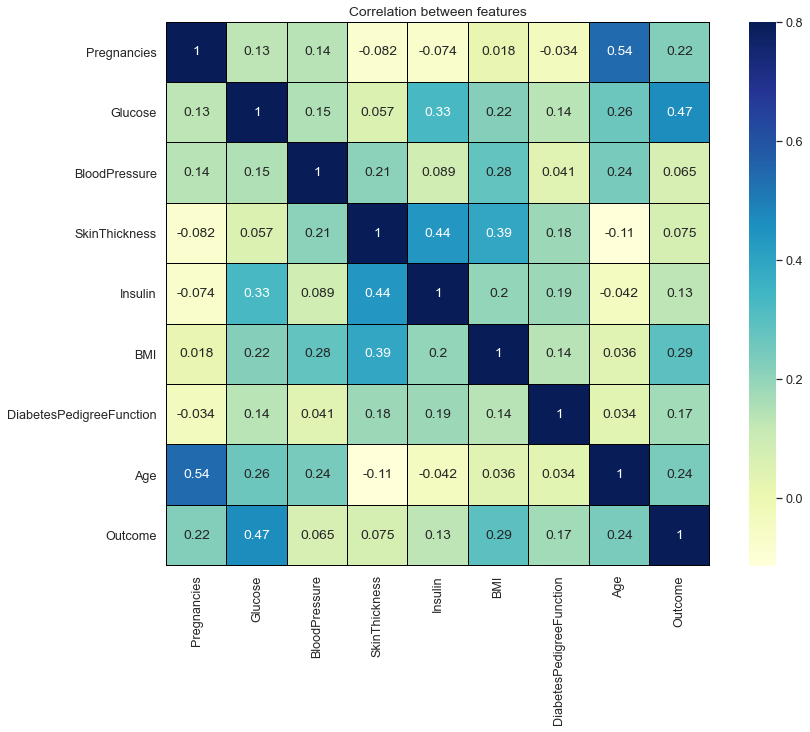

In [7]:
# Check Correlation 

corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

In [8]:
# Divide the data set into train and test in the ratio 75:25
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#printing shapes of testing and training sets :
print("shape of original dataset :", df.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (768, 9)
shape of input - training set (576, 8)
shape of output - training set (576,)
shape of input - testing set (192, 8)
shape of output - testing set (192,)


Accuracy  79.6875


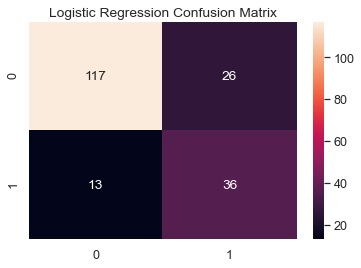

In [9]:
# Selecting the Model
LR = LogisticRegression(max_iter=1000)

# fitting the model to the training data
LR.fit(X_train, y_train)

# prediction on the test data
y_pred = LR.predict(X_test)

# Calculating Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

# Plotting the confusion matrix
#sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Accuracy  73.95833333333334


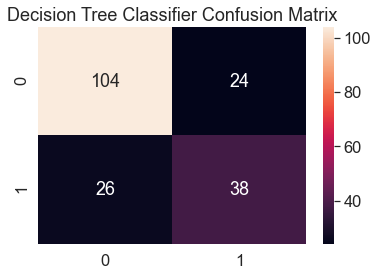

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
DT = DecisionTreeClassifier()

# fitting the model
DT.fit(X_train, y_train)

# prediction on the test data
y_pred = DT.predict(X_test)

# Calculating Accuracy of the model
print("Accuracy ", DT.score(X_test, y_test)*100)

# Plotting the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()